<a href="https://colab.research.google.com/github/xinnazim/esaa/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%99%80%EC%9D%B8%ED%92%88%EC%A7%88%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
 
## 실제 모델링을 위한 패키지
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics
 

# 데이터 불러오기

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
smpl_sub = pd.read_csv('sample_submission.csv')


# 1. EDA, 데이터 전처리

In [ ]:
train.head() #13개 변수

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test.head() #quality 변수 없음

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [ ]:
train.info() #null 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


<Axes: >

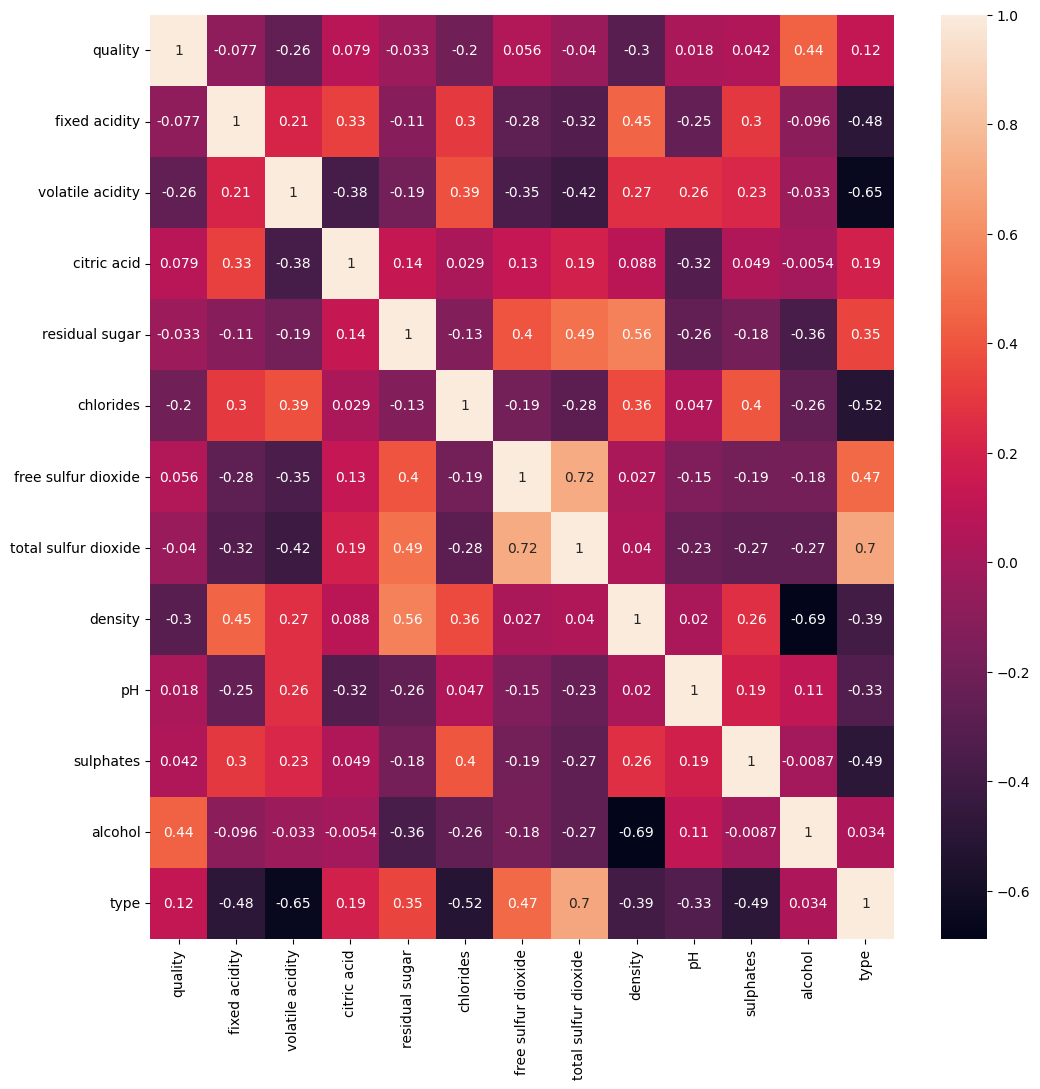

In [ ]:
# train 변수 간 상관관계
plt.figure(figsize=(12,12))
sns.heatmap(data=train.corr(),annot = True) 

* quality 변수와 alcol 상관관계 높음=0.44

<Axes: xlabel='quality', ylabel='count'>

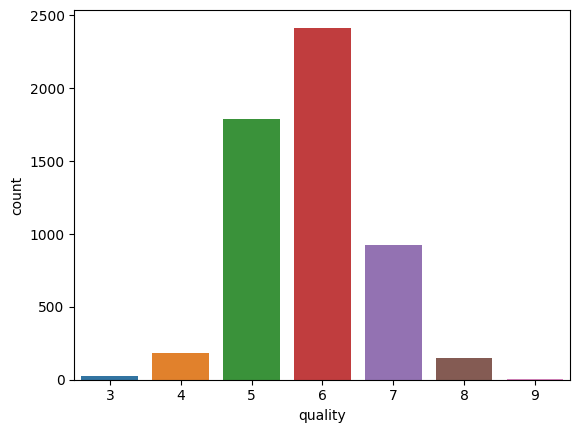

In [ ]:
# 데이터 분포 확인
# 1. target=quality

train['quality'].value_counts()
sns.countplot(x = train['quality'])

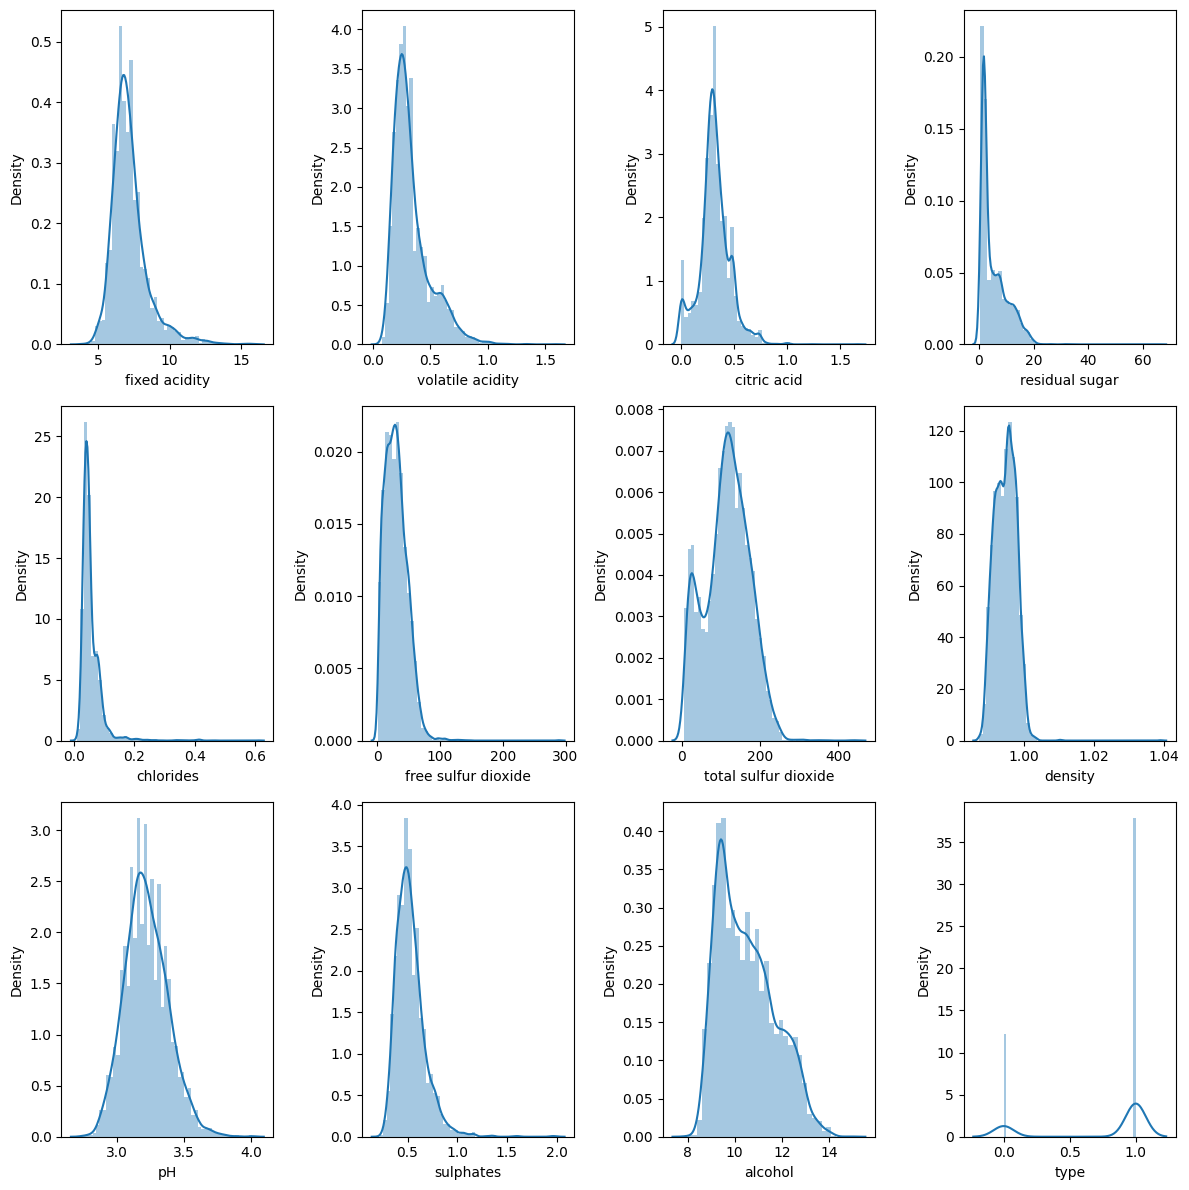

In [ ]:
# 2. 변수별 분포 시각화

plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

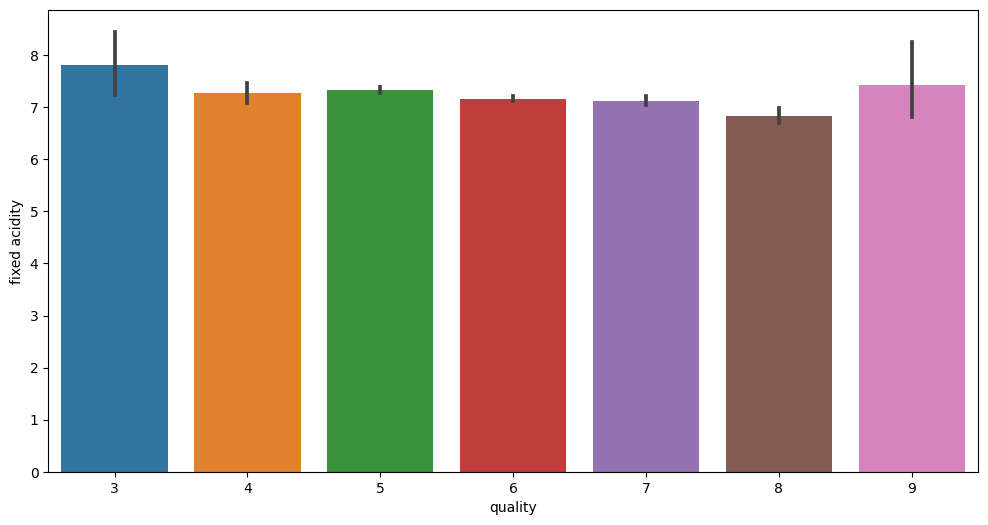

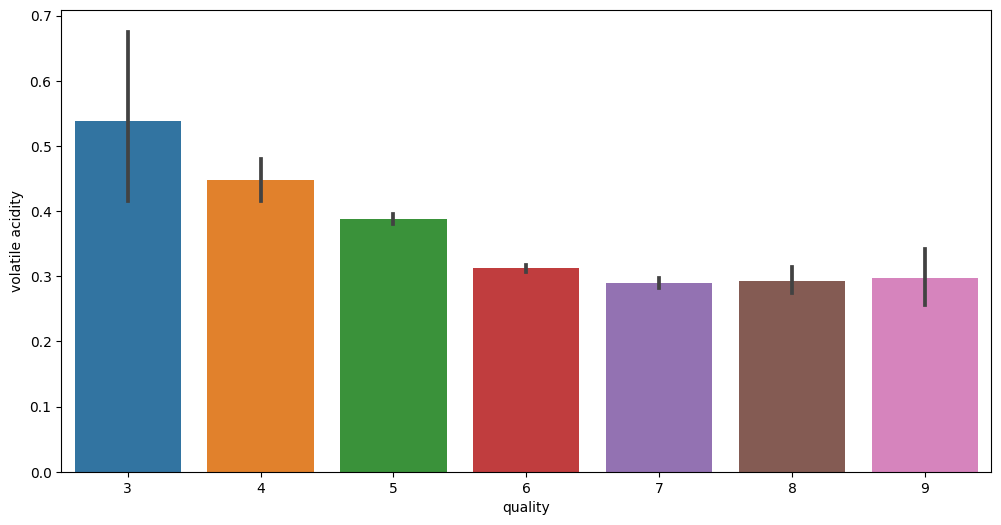

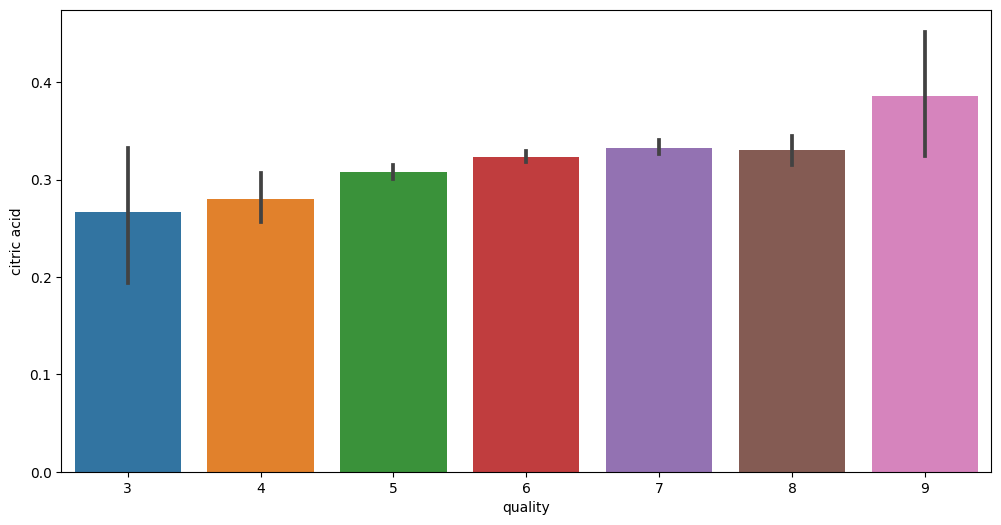

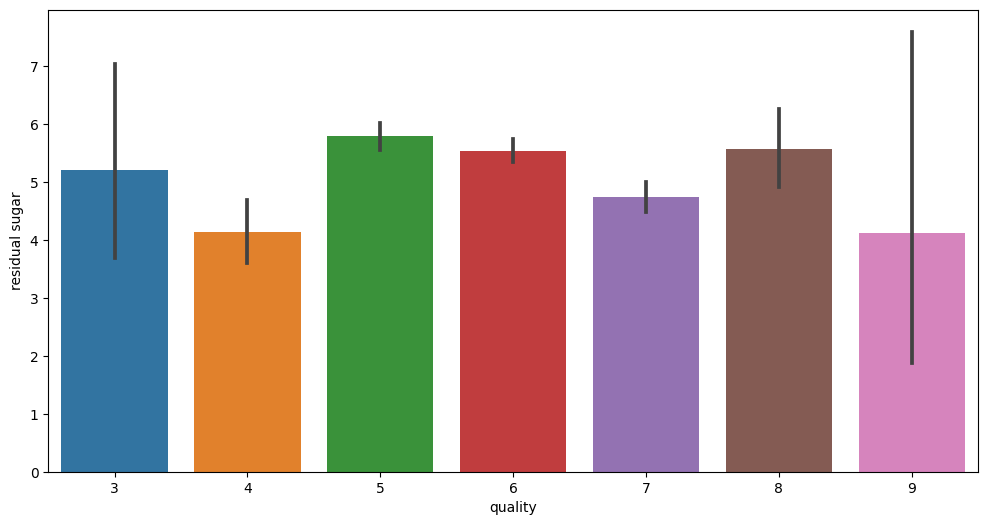

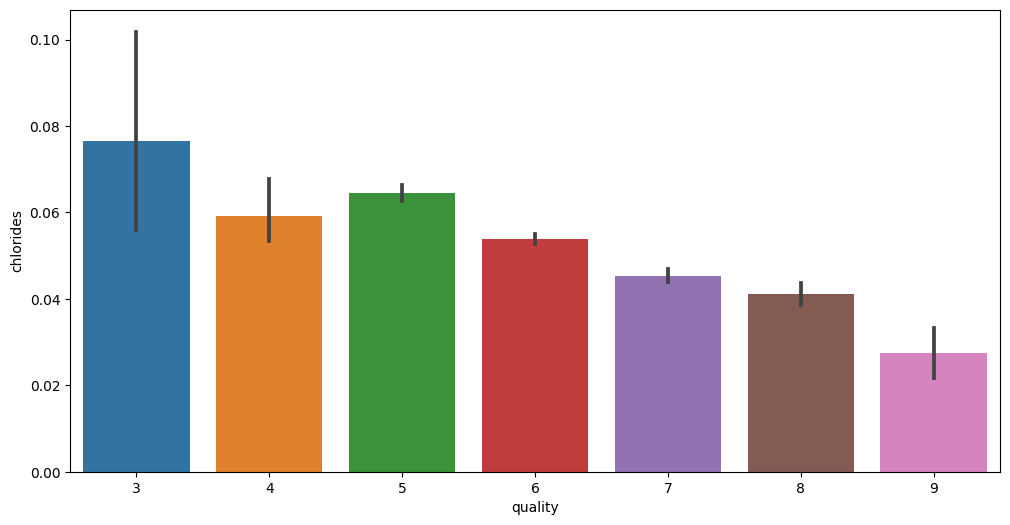

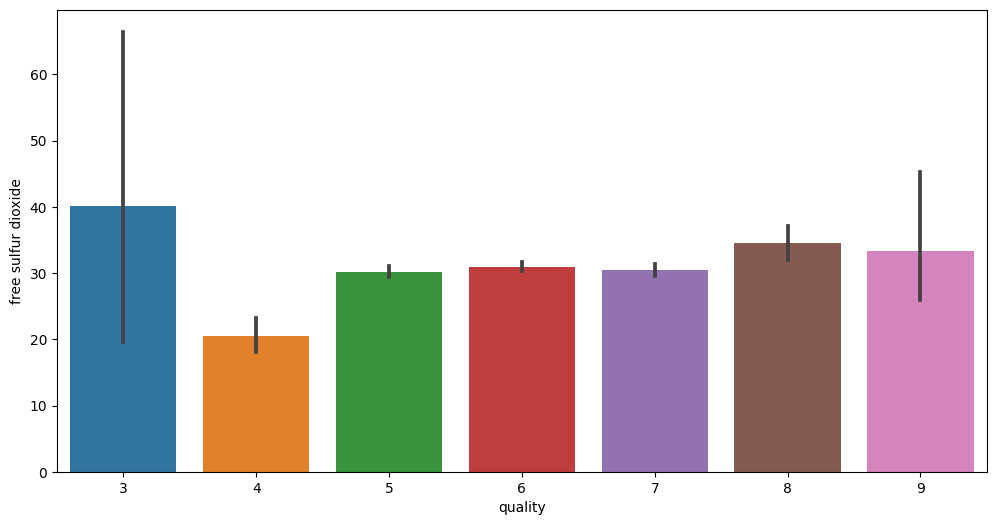

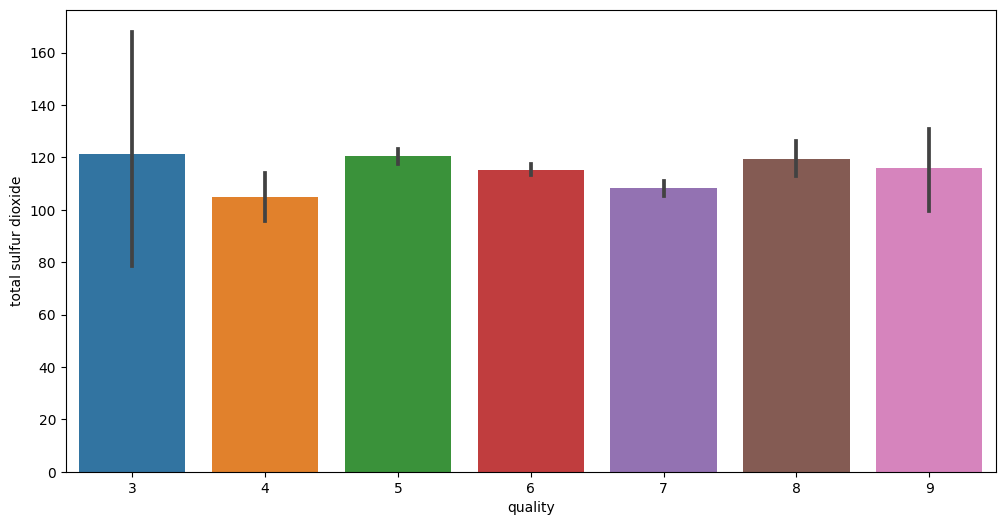

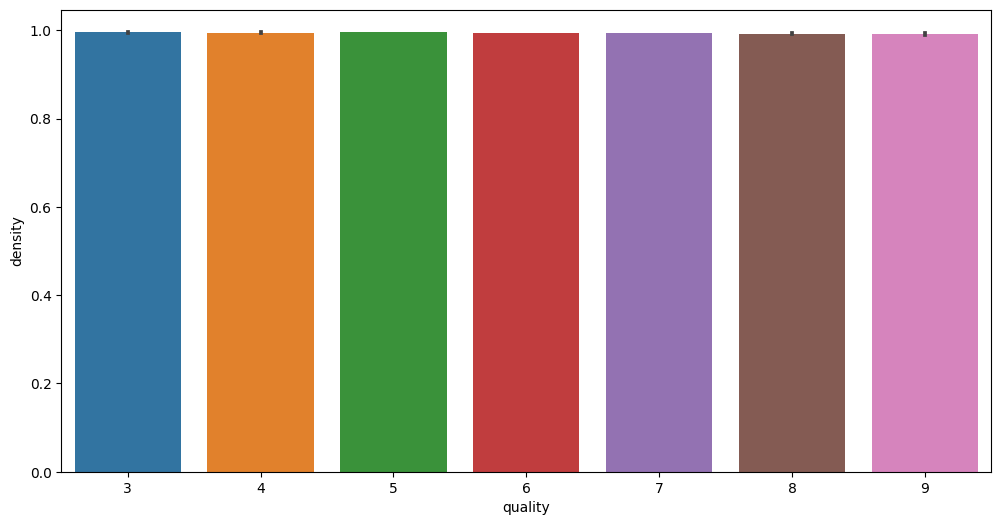

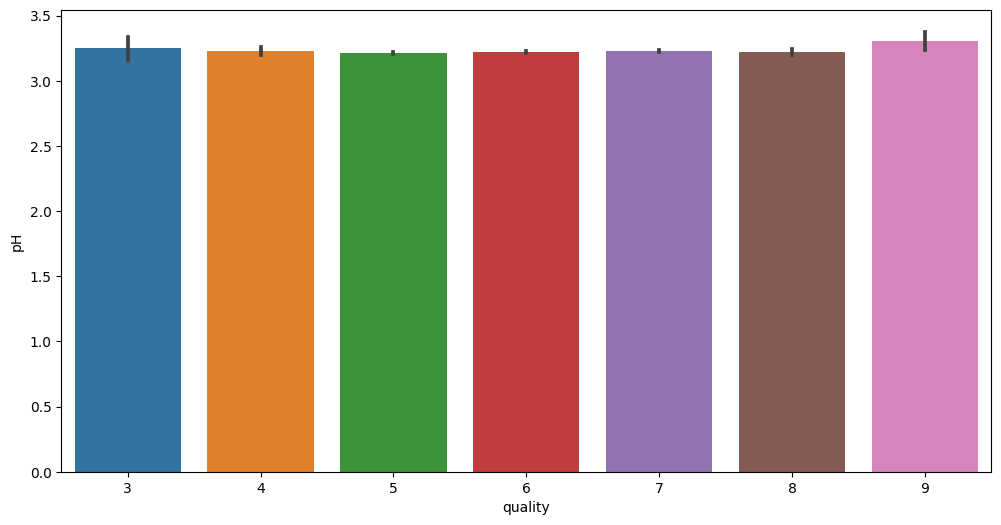

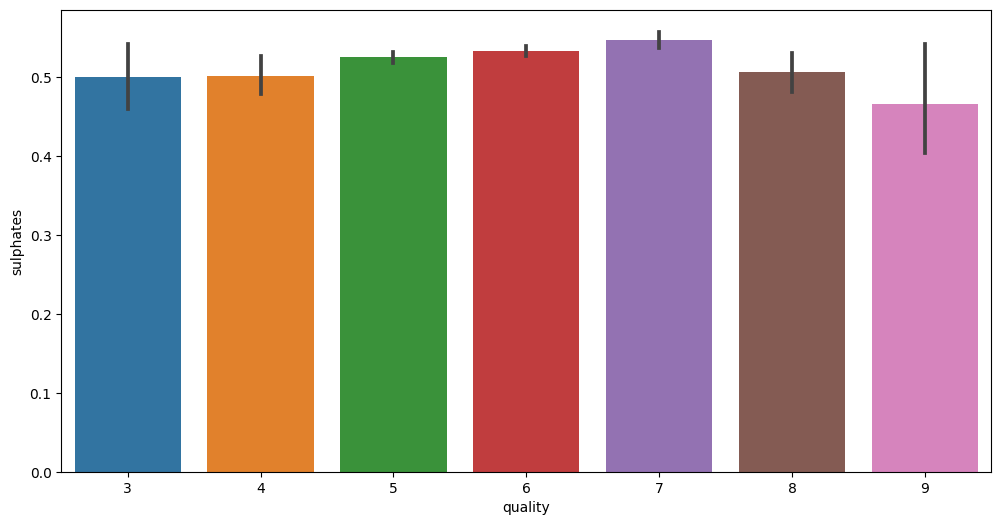

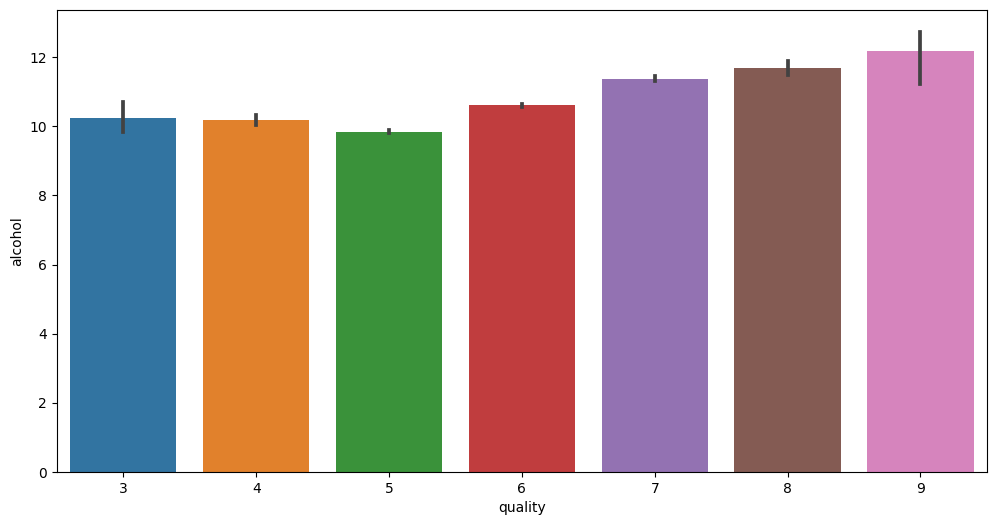

In [ ]:
# 2. 변수별 분포 시각화

plt.figure(figsize=(12,12))
for i in range(1,13):
  plt.subplot(3,4,i)
  sns.displot(train.iloc[:,i])
plt.tight_layout()
plt.show()

for i in range(11):
  fig=plt.figure(figsize=(12,6))
  sns.barplot(x='quality',y=train.columns[i+2],data=train)



In [ ]:
# 불필요한 변수 제거

train = train.drop('index', axis = 1)
test = test.drop('index', axis = 1)


In [ ]:
# type에는 white와 red 두 종류-> 0,1 로 변환

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [ ]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [ ]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


In [ ]:
X = train.drop(['quality'], axis = 1) #feature
y = train['quality'] #target

In [ ]:
#표준화

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X) #변수들간 스케일이 달라서 표준화 진행


# 모델링

1. Decision Tree
2. 앙상블-보팅
3. 랜덤 포레스트 0.696
4. GBM
5. XGBoost
6. LightGBM

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
import lightgbm as lgbm
from xgboost import XGBClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

# 1. Decision Tree

In [ ]:
# 1. Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop('index',axis = 1 ,inplace =True)
test.drop('index',axis = 1 ,inplace =True)

In [ ]:
# 랜덤 포레스트 
from sklearn.ensemble import RandomForestClassifier

#모델
model=RandomForestClassifier()

#모델 학습
model.fit(train_x,train_y)

#test 데이터 예측
y_pred = model.predict(test_x)

smpl_sub = pd.read_csv('sample_submission.csv')
smpl_sub['quality']=y_pred
smpl_sub

smpl_sub.to_csv('randomforest.csv', index=False)


In [ ]:
#하이퍼 파라미터
model = RandomForestClassifier()
params={'n_estimators':[50,100,150,200,400,500],'max_features':[0.2,0.4,0.6,0.8,1.0]}
gridsearch=GridSearchCV(model,params,cv=5)
gridsearch.fit(X,y)
gridsearch.best_params_

{'max_features': 0.6, 'n_estimators': 400}

In [ ]:
rf_m1=RandomForestClassifier(max_features=0.6, n_estimators=400)
rf_m1.fit(X,y)
print('최고 예측 정확도:{0:4f}'.format(gridsearch.best_score_))

최고 예측 정확도:0.677821


# LightGBM 모델

In [ ]:
model = lgbm.LGBMClassifier()
model.fit(X,y)

LGBMClassifier()

In [ ]:
from lightgbm import LGBMClassifier
model = lgbm.LGBMClassifier()

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop('index',axis = 1 ,inplace =True)
test.drop('index',axis = 1 ,inplace =True)

# Onehot Encoding (pd.get_dummies())
train_df=pd.get_dummies(data=train, columns=['type'], prefix=['type'])
test_df=pd.get_dummies(data=test, columns=['type'], prefix=['type'])

X = train_df.drop('quality',axis= 1)
y = train_df['quality']

model.fit(X,y)

# predict 메소드와 원핫 인코딩한 test 데이터를 이용해 품질 예측
pred = model.predict(test_df)

smpl_sub = pd.read_csv('sample_submission.csv')
smpl_sub['quality']=pred
smpl_sub.head()



,index,quality
0,0,5
1,1,5
2,2,6
3,3,5
4,4,6


In [ ]:
smpl_sub.to_csv('LightGBM.csv', index=False)

# XGBoost = 0.675

In [ ]:
#Label Encoding / 레이블 인코딩으로 숫자를 바꾸려고 0,1,2
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_df['quality']=encoder.fit_transform(train_df['quality'])

In [ ]:
# XGBoost
from xgboost import XGBClassifier

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop('index',axis = 1 ,inplace =True)
test.drop('index',axis = 1 ,inplace =True)

# Onehot Encoding (pd.get_dummies())
train_df = pd.get_dummies(train)
test_df = pd.get_dummies(test)

#Label Encoding / 레이블 인코딩으로 숫자를 바꾸려고 0,1,2
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_df['quality']=encoder.fit_transform(train_df['quality'])

# 모델 학습

#모델
model = XGBClassifier()

# X 는 train에서 quality 를 제외한 모든 변수
# y 는 train의 qulity 변수
X = train_df.drop('quality',axis= 1)
y = train_df['quality']



model.fit(X,y)

# predict 메소드와 원핫 인코딩한 test 데이터를 이용해 품질 예측
pred = model.predict(test_df)
pred = encoder.inverse_transform(pred)

smpl_sub = pd.read_csv('sample_submission.csv')
smpl_sub['quality']=pred
smpl_sub.head()

smpl_sub.to_csv('XGBoost.csv', index=False)

In [ ]:
cm = confusion_matrix(y, pred)
print(cm)
accuracy_score(y, pred)

ValueError: ignored

In [ ]:
smpl_sub.head()

,index,quality
0,0,5
1,1,6
2,2,6
3,3,5
4,4,6


# Voting Classifier 